# Advanced Computational Physics


## More about Python: Functions, Classes and Symbolic computing
### Symbolic computing


#### *X. Cid Vidal*
####  USC, October 2024

In [ ]:
import time
print('Last revision ', time.asctime())

Last revision  Wed Nov  6 14:03:29 2024


### 1. Introduction to symbolic computing
Symbolic computing is a very handy tool to manipulate math expressions symbolically, not numerically. With symbolic computing we can:
 - Represent precise mathematical objects for exact manipulation.
 - Perform tasks like simplification, differentiation, and integration symbolically.
 - Handle complex math as that used in science and engineering.

<img src="https://miro.medium.com/v2/resize:fit:563/1*DVd8MRxm1kYxwgucciLiXw.png" alt="drawing" width="450"/>

### 1.1 Sympy
Sympy is the **very powerful** Python library for symbolic mathematics. It allows to perform various symbolic operations like algebra and calculus, supporting tasks such as simplification, differentiation, and integration.
An excellent documentation can be found [here](https://docs.sympy.org/latest/index.html).
Let's see an example:

In [ ]:
import sympy
import math
print (math.sqrt(12))
print (sympy.sqrt(12))

3.4641016151377544
2*sqrt(3)


In [ ]:
from sympy import *

x = symbols("x")
expr = sin(x)**2 + 2*x
exprd = diff(expr)
print("Unicode")
pprint(expr,use_unicode=True)
pprint(exprd,use_unicode=True)
print("LaTex")
print(latex(expr))
print(latex(exprd))

Unicode
         2   
2⋅x + sin (x)
2⋅sin(x)⋅cos(x) + 2
LaTex
2 x + \sin^{2}{\left(x \right)}
2 \sin{\left(x \right)} \cos{\left(x \right)} + 2


### 1.2 Symbols
The most crucial category within the SymPy library is the 'Symbol' class, which is essential for carrying out symbolic computations. The variables in SymPy are instances of the 'Symbols' class.

In [ ]:
from sympy import Symbol, symbols
x=Symbol('x')
y=Symbol('y')
expr=x**2+y**2
expr

x**2 + y**2

Other definitions are possible

In [ ]:
x,y=symbols('x y')
c,d=symbols('c,d')
print(x,y,c,d)
######
s=Symbol('side')
print(s**3)
######
print(symbols('mark(1:4)'))


x y c d
side**3
(mark1, mark2, mark3)


One can easily replace a symbol by:

 a) another one

 b) an expression

 c) a number

In [ ]:
expr=x**2+y**2
print("expr0=")
pprint(expr)
print("expr1=")
pprint(expr.subs(y,x))
print("expr2=")
pprint(expr.subs(y,sin(x)))
print("expr3=")
pprint(expr.subs(x,2).subs(y,3))

expr0=
 2    2
x  + y 
expr1=
   2
2⋅x 
expr2=
 2      2   
x  + sin (x)
expr3=
13


### 1.3 Simpify, evalf and Lambdify
One cool feature of sympy is that it allows to parse a simple string and covert into a sympy expression

In [ ]:
expr="x**2+3*x+2"
print(type(expr))
expr1=sympify(expr)
print(type(expr1))
pprint(expr1)
print(expr1.subs(x,1))
## yet another example
pprint(sympify("10/5+4/2", evaluate=False))

<class 'str'>
<class 'sympy.core.add.Add'>
 2          
x  + 3⋅x + 2
6
10   4
── + ─
5    2


Let's look at another example, now introducing evalf


In [ ]:
a,b=symbols("a b")
expr=sympify("a/b")
## evaluate the expression, with 20 digits of precision
expr.evalf(20, subs={a:100, b:3})

33.333333333333333333

The opposite to sympify is done by Lambdify. It converts an expression into a python function!

In [ ]:
expr=a**2+b**2
f=lambdify([a,b],expr)
print(f(2,3))

13


### 1.4 Simplification

Sympy allows the manipulation of mathematical expressions: simplification, expansion, factorization...

For instance, **simplify** just tries to *generally* arrive to the simplest form of mathematical expressions. **Expand** does the opposite

In [ ]:
from sympy import *
x=Symbol('x')
expr=sin(x)**2 + cos(x)**2
print("simplify",expr,'->',simplify(expr))
########
a,b=symbols('a b')
print("expand: (a+b)**2")
expand((a+b)**2)


simplify sin(x)**2 + cos(x)**2 -> 1
expand: (a+b)**2


a**2 + 2*a*b + b**2

Other methods for you to explore are **factor**, **collect**, **cancel**, **trigsimp**...

### 1.5 Derivative and integration
This is one of the most handy aspects of sympy... Would have been useful in many undergrad courses! :-)

The derivatives are just done with **diff**, where one needs to provide an expression and the variable we're differentiating

In [ ]:
from sympy import diff, sin, exp
from sympy.abc import x,y
expr=x*sin(x*x)+1
pprint(expr)
pprint(diff(expr,x))
pprint(diff(expr,y))

     ⎛ 2⎞    
x⋅sin⎝x ⎠ + 1
   2    ⎛ 2⎞      ⎛ 2⎞
2⋅x ⋅cos⎝x ⎠ + sin⎝x ⎠
0


One can also compute derivatives of higher order!

In [ ]:
expr = x**5
[diff(expr,x,i) for i in range(1,7)]

[5*x**4, 20*x**3, 60*x**2, 120*x, 120, 0]

To integrate, the syntax is what you would expect: integrate(expression,variable) or integrate(expression,(variable,lower_limit,upper_limit))

In [ ]:
from sympy import *
x,y = symbols('x y')
expr=x**2 + x + 1
integrate(expr, x)

x**3/3 + x**2/2 + x

In [ ]:
## a definite example, note notation for infinity
integrate(exp(-x**2),(x,-oo,oo))

sqrt(pi)

You can also do n-dimensional integrals! Let's get the volume of a radius 1 sphere

In [ ]:
r,theta,phi = symbols("r theta phi")
integrate(r**2*sin(theta),(r,0,1),(theta,0,pi),(phi,0,2*pi))

4*pi/3

Sympy also supports the well-know integral transforms
 - laplace_transform
 - fourier_transform
 - sine_transform
 - cosine_transform
 - hankel_transform

 as well as other important operations, such as limits, Fourier series...

In [ ]:
k = Symbol("k")
##piecewise function 0<x,1>x
f = Piecewise((0,x<0),(1,True))
fourier_series(f, (x,-pi,pi))


FourierSeries(Piecewise((0, x < 0), (1, True)), (x, -pi, pi), (1/2, SeqFormula(Piecewise((sin(_n*pi)/_n, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (pi, True))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula(Piecewise((-cos(_n*pi)/_n + 1/_n, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*x)/pi, (_n, 1, oo))))

In [ ]:
limit(sin(x)/x,x,0)

1

### 1.6 Matrices
Matrices can also dealt with by sympy in a very intuitive way. It allows all sort of operations!

In [ ]:
from sympy.matrices import Matrix
m=Matrix([[1,2,3],[2,3,1],[3,0,1]])
m

Matrix([
[1, 2, 3],
[2, 3, 1],
[3, 0, 1]])

In [ ]:
dir(m)

['C',
 'D',
 'H',
 'LDLdecomposition',
 'LDLsolve',
 'LUdecomposition',
 'LUdecompositionFF',
 'LUdecomposition_Simple',
 'LUsolve',
 'QRdecomposition',
 'QRsolve',
 'T',
 '__abs__',
 '__add__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_class_priority',
 '_diff_wrt',
 '_dod_to_DomainMatrix',
 '_eval_Abs',
 '_eval_Mod',
 '_eval_add',
 '_eval_adjoint',
 '_eval_applyfunc',
 '_eval_as_real_imag',
 '_eval_atom

In [ ]:
m.inv()

Matrix([
[-3/22,  1/11,  7/22],
[-1/22,  4/11, -5/22],
[ 9/22, -3/11,  1/22]])

In [ ]:
m2=Matrix([[0,4,3],[2,0,1],[1,0,1]])
m+m2

Matrix([
[1, 6, 6],
[4, 3, 2],
[4, 0, 2]])

In [ ]:
m*m2

Matrix([
[7,  4,  8],
[7,  8, 10],
[1, 12, 10]])

### 1.7 Geometry
The geometry module is very handy to deal with 2D or even 3D entities!

In [ ]:
from sympy.geometry import Point
from sympy import *
x=Point(0,0)
y=Point(2,2)
z=Point(4,4)
print(Point.is_collinear(x,y,z))
######
x=Point(0,0,0)
y=Point(2,2,2)
z=Point(4,4,0)
print(Point.is_collinear(x,y,z))

True
False


In [ ]:
from sympy.geometry import Point, Line
p1, p2=Point(0,5), Point(5,0)
l1=Line(p1,p2)
l2=Line(Point(0,0), Point(5,5))
l1.intersection(l2)

[Point2D(5/2, 5/2)]

In [ ]:
## yet another example...
x,y,z=symbols('x y z')
p=Point(x,y,z)
p.distance(Point(0,0,0))

sqrt(x**2 + y**2 + z**2)

In [17]:
## and one more
c1 = Circle(Point(0, 0), 5)
c1.equation(x,y)

x**2 + y**2 - 25

### 1.8 Solvers
Sympy also provides a number of solvers, useful to deal with linear or non linear systems. They can provide numeric or algebraic solutions.
By default, the solvers provide a solution assuming an expr equals 0.
The easiest solves are **solve** and **nsolve**. Nsolve just works numerically!

In [ ]:
from sympy import *
x,y = symbols("x y")
## solve the expression x**2-y**2=0, where the variable is y
print("sols for y are:")
print(solve(x**2-y**2,y))

## now numerically
print("sols for x are:")
print(solve(x**2-2*x+1,x))



## more complex case
print("sols for x are:")
### note, the third argument is an initial value to start looking around
expr=log(x)-x+6
res=nsolve(expr,x,5)
print(res)
print("test")
print(expr.subs(x,res))


sols for y are:
[-x, x]
sols for x are:
[1]
sols for x are:
8.09071740515548
test
4.44089209850063e-16


**linsolve** allows to solve a set of linear equations

\begin{cases}
 & x-y=1 \\
 & x+y=2
\end{cases}

In [ ]:
linsolve([x-y-1,x+y-2],(x,y))

{(3/2, 1/2)}

**nonlinesolve** works for other cases

\begin{cases}
 & a^2+a=0 \\
 & a-b=0
\end{cases}

In [ ]:
a,b=symbols('a b')
nonlinsolve([a**2 + a, a - b], [a, b])

{(-1, -1), (0, 0)}

One can even solve differential equations with **dsolve**!!
It's fairly easy, let's try to solve

$f(x)-f'(x)=sin(x)$

In [ ]:
x=Symbol('x')
f=symbols('f', cls=Function)
dsolve(f(x)-diff(f(x),x)- sin(x), f(x))


Eq(f(x), C1*exp(x) + sin(x)/2 + cos(x)/2)

### 1.9 Plotters
Together with matplotlib, sympy can also plot expressions!
Let's see some examples

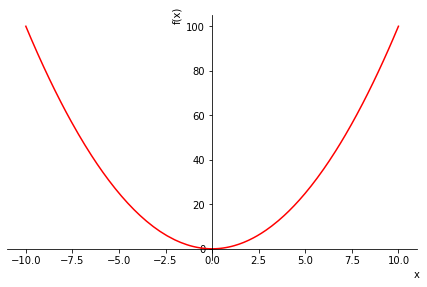

In [ ]:
from sympy.plotting import plot
from sympy import *
x=Symbol('x')
plot(x**2, line_color='red')

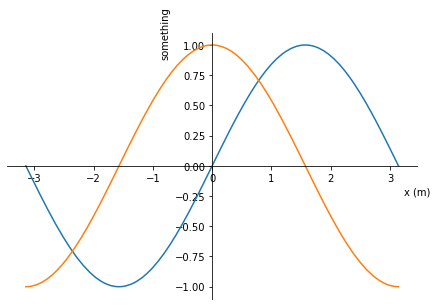

In [ ]:
plot( sin(x),cos(x), (x, -pi, pi),xlabel="x (m)",ylabel="something")

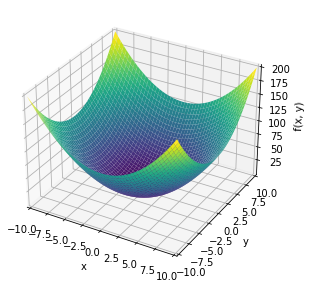

In [ ]:
from sympy.plotting import plot3d
x,y=symbols('x y')
plot3d(x**2+y**2, (x, -10,10), (y, -10,10))

### Exercises

1. Create a symbol x and an expression $f = x^2 + 2x - 3$. Then, find the value of f when x = 5.



In [1]:
import sympy as sp

x = sp.symbols('x')

f = x**2 + 2*x - 3

result = f.subs(x, 5)

print(result)

32


2. Factor the polynomial $x^3 - 3x^2 + 2x - 6$ and find its roots.


In [7]:
import sympy as sp

x = sp.symbols('x')

pol = x**3 - 3*x**2 +2*x - 6

factors = sp.factor(pol)
roots = sp.roots(pol)

print('Factors:')
print(factors)
print()
print('Roots:')
print(roots)


Factors:
(x - 3)*(x**2 + 2)

Roots:
{3: 1, -sqrt(2)*I: 1, sqrt(2)*I: 1}



3. Integrate the function $sin(x)cos(x)$ with respect to x, both generally and in the interval $-\pi,\pi$


In [9]:
import sympy as sp

x = sp.symbols('x')

f = sp.sin(x) * sp.cos(x)


integral = sp.integrate(f, x)
eval_integral = sp.integrate(f, (x, -sp.pi, sp.pi))

print('General integral: ', integral)
print('Integral over the interval [-pi, pi]: ', eval_integral)

General integral:  sin(x)**2/2
Integral over the interval [-pi, pi]:  0



4. Solve the system of equations $2x + 3y = 5, 3x - 2y = 7$ for x and y


In [10]:
import sympy as sp

x, y = sp.symbols('x y')

eq1 = 2*x + 3*y - 5
eq2 = 3*x -2*y - 7

sols = sp.solve([eq1,eq2], [x,y])

print(sols)

{x: 31/13, y: 1/13}



5. Create a 2x2 matrix A = [[1, 2], [3, 4]] and find its inverse, determinant, and eigenvalues.

In [14]:
import sympy as sp

A = sp.Matrix([
    [1, 2],
    [3, 4]
])

print('A = ', A)

A_inv = A.inv()

print('A^{-1} = ', A_inv)

det_A = A.det()

print('det(A) = ', det_A)

eigenvalues = A.eigenvals()

print('Eigenvalues: ', eigenvalues)

A =  Matrix([[1, 2], [3, 4]])
A^{-1} =  Matrix([[-2, 1], [3/2, -1/2]])
det(A) =  -2
Eigenvalues:  {5/2 - sqrt(33)/2: 1, 5/2 + sqrt(33)/2: 1}


### ++ Exercise

I really love Audi cars, so I am seriously considering to build a small gold keychain of the Audi logo.

<img src="https://media.printables.com/media/prints/639027/images/5050615_37130c9e-4c22-45c9-b13c-16489c50498b_3d2be0fe-c9c7-417d-9594-d251d58ffb59/audi-symbol.png" alt="drawing" width="250"/>

Each outer ring would have an outer radius of 3/4 cm, and an inner radius of $\sqrt{7}/4$ cm, and the center of each ring would be located at -2,-1,0 and 1 cm. Then the thickness of the keychain would be 0.5 cm. Could you please use sympy to:

1. Parameterize the rings

2. Plot them

3. Obtain the combined volume of all the rings (you can neglect the intersections)

4. Provide me with an estimate of the price, assuming the cost of gold to be 59 €/g and its density 19.32 g/cm$^3$

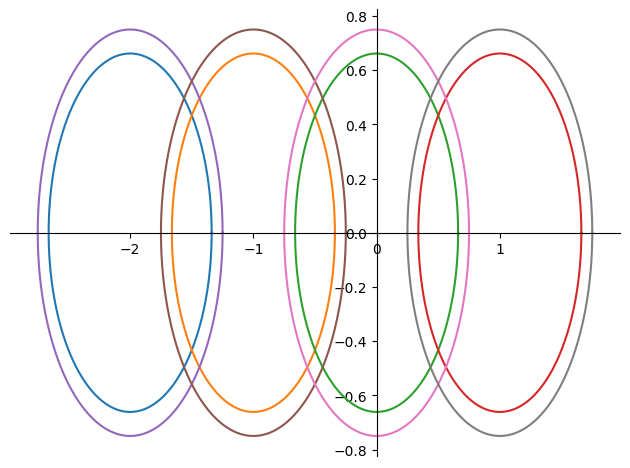

Volume = 0.25*pi cm³ = 0.79 cm³
The price is  895.26 €


In [82]:
from os import O_NOCTTY
import sympy as sp

def circle(r, theta, x0):

  return r*sp.cos(theta) + x0, r*sp.sin(theta)

r1 = sp.sqrt(7)/4
r2 = 3/4

thickness = 0.5

theta = sp.symbols('theta')

inner = [circle(r1, theta, x0) for x0 in [-2, -1, 0, 1]]
outer = [circle(r2, theta, x0) for x0 in [-2, -1, 0, 1]]

total = inner + outer

sp.plot_parametric(*total, (theta, 0, 2*sp.pi))

# For the volume we can take 1 ring and multiply by 4

r, theta, z = sp.symbols('r theta z')

volume = sp.integrate(r, (r, r1, r2), (theta, 0, 2*sp.pi), (z, 0, thickness)) # int _0^thickness dz int _r1^r2 dr r int_0^2pi dtheta

total_volume = 4*volume
print(f'Volume = {total_volume} cm³ = {float(total_volume):.2f} cm³')

# Price

gold_price = 59 # €/g
gold_density = 19.32 # g/cm³

price = total_volume * gold_density * gold_price

print(f'The price is {float(price): .2f} €')
